## Rascunho do Projeto Módulo 01
Esse rascunho irá servir como apoio para a construção do Projeto Módulo 01

In [1]:
#importação das bibliotecas utilizadas no decorrer do notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

In [2]:
#Lendo o arquivo "../datasets/AIH_aprovadas.csv" com separador ";" 
#Foi aplicado a leitura para codificação de caracteres "ISO-8859-1"
#Também foi removido a ultima linha com o skipfooter para remover o total já calculado
#O "usecols" foi aplicado para puxar apenas os meses de 2008/Fev até 2020/Dez
#e para finalizar a importação, coloquei o engine='python' para remover uma mensagem de warning em relação a importação
df_aih_aprovadas = pd.read_csv("../datasets/AIH_aprovadas.csv", sep=";", 
                   encoding="ISO-8859-1",
                   usecols = [i for i in range(287) if (i == 0 or i > 127 and i < 283)],
                   skipfooter=1, engine='python')
#setando o index como "Unidade da Federação"
df_aih_aprovadas = df_aih_aprovadas.set_index("Unidade da Federação")

In [3]:
#Lendo o arquivo "../datasets/A111057189_28_143_208.csv" com separador ";" 
#Foi aplicado a leitura para codificação de caracteres "ISO-8859-1"
#Também foi removido aalgumas linhas com skiprows e skipfooter 
#O "usecols" foi aplicado para puxar apenas os meses de 2008/Fev até 2020/Dez
#Com o "decimal" deliminamos as casas decimais do dataset
#e para finalizar a importação, coloquei o engine='python' para remover uma mensagem de warning em relação a importação
df_media_permanencia = pd.read_csv("../datasets/A111057189_28_143_208.csv", sep=";", 
                   encoding="ISO-8859-1",decimal=",",
                   usecols = [i for i in range(172) if (i == 0 or i > 13 and i < 169)],
                   skiprows=3, skipfooter=12, engine='python')
#setando o index como "Unidade da Federação"
df_media_permanencia = df_media_permanencia.set_index("Unidade da Federação")

In [4]:
#Lendo o arquivo "../datasets/A111605189_28_143_208.csv" com separador ";" 
#Foi aplicado a leitura para codificação de caracteres "ISO-8859-1"
#Também foi removido aalgumas linhas com skiprows e skipfooter 
#O "usecols" foi aplicado para puxar apenas os meses de 2008/Fev até 2020/Dez
#com o "thousands" delimitamos a separação dos milhares
#e para finalizar a importação, coloquei o engine='python' para remover uma mensagem de warning em relação a importação
df_obitos = pd.read_csv("../datasets/A111605189_28_143_208.csv", sep=";", 
                   encoding="ISO-8859-1",thousands=".",
                   usecols = [i for i in range(180) if (i == 0 or i > 21 and i < 177)],
                   skiprows=3, skipfooter=12, engine='python')
#setando o index como "Unidade da Federação"
df_obitos = df_obitos.set_index("Unidade da Federação")

In [5]:
coluna_regiao=[] #criando uma lista para registrar os valores das regiões em relação aos estados
coluna_estado=[] #criando uma lista para registrar os valores dos estados sem o identificador número que contém no indíce

regioes=['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'] #criando uma lista com as regiões pré-definidas

for linha in df_aih_aprovadas.iterrows(): #aqui iniciamos um loop for que vai percorrer todas as linhas do "df_aih_aprovadas" 
                                        #para pegar a "Unidade da Federação"(os valores dos estados) e fazer as validações
                                        #porém aqui a gente podia usar qualquer um dos dataframes, dado que todos estão ordenados pela Unidade da Federação
    
    estado=linha[0] #criamos uma variável "estado" para pegar o valor de cada estado, que é o indice 0 de cada linha
    id_regiao = int(estado.split(' ')[0]) #aqui pegamos o identificador da região, que no caso são os numeros antes do nome do estado
    estado_sem_id = estado.split(' ', maxsplit = 1)[1] #aqui pegamos apenas o nome do estado
    
    coluna_estado.append(estado_sem_id) #adicionando os estados à lista coluna_estado
    
    #aqui verificamos cada id e adicionamos à coluna_regiao o valor referente da região do estado
    if id_regiao < 20:
        coluna_regiao.append(regioes[0])
    elif id_regiao < 30:
        coluna_regiao.append(regioes[1])
    elif id_regiao < 40:
        coluna_regiao.append(regioes[2])
    elif id_regiao < 50:
        coluna_regiao.append(regioes[3])
    else:
        coluna_regiao.append(regioes[4])
        
#adicionamos os valores de coluna_regiao para cada dataframe
df_aih_aprovadas["Região"] = coluna_regiao
df_media_permanencia["Região"] = coluna_regiao
df_obitos["Região"] = coluna_regiao

#adicionamos os valores da coluna_estado para cada dataframe
df_aih_aprovadas["Estado"] = coluna_estado
df_media_permanencia["Estado"] = coluna_estado
df_obitos["Estado"] = coluna_estado


<AxesSubplot:xlabel='Unidade da Federação'>

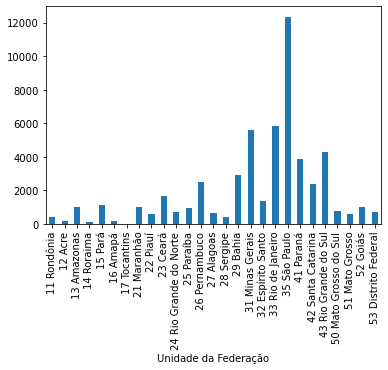

In [6]:
df_obitos["2020/Dez"].plot(kind='bar')

<AxesSubplot:xlabel='Região'>

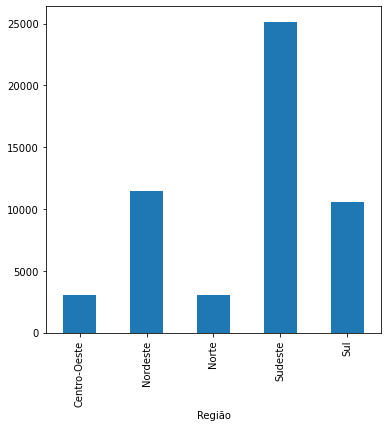

In [7]:
df_obitos.groupby(by=["Região"])["2020/Dez"].sum().plot(kind="bar",figsize=(6,6))

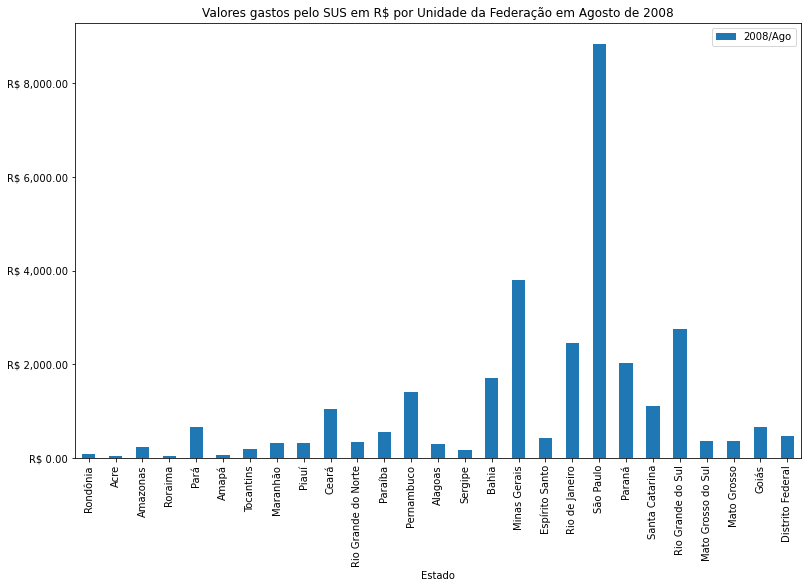

In [8]:
ax = df_obitos.plot(x="Estado",y="2008/Ago",kind="bar",figsize=(13,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Valores gastos pelo SUS em R$ por Unidade da Federação em Agosto de 2008")
plt.show()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2008/Fev,65,115,306,18,583,61,199,347,322,1054,...,420,2185,7477,1813,956,2248,313,375,615,404
2008/Mar,103,110,272,28,641,44,215,327,327,1147,...,523,2349,8089,1899,1051,2441,344,405,661,435
2008/Abr,96,103,295,27,624,57,199,328,296,1189,...,541,2409,7993,1958,1029,2423,332,400,669,481
2008/Mai,92,103,304,26,635,64,211,325,337,1223,...,451,2657,9107,2102,1113,2724,378,389,542,488
2008/Jun,106,96,286,35,648,39,178,329,316,1152,...,518,2528,9007,2119,1160,2881,395,372,598,446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/Ago,423,150,684,98,1193,93,268,1231,700,1768,...,1140,5223,13727,3628,2364,4093,981,785,1782,899
2020/Set,335,131,693,99,1052,87,131,1067,639,1777,...,924,4880,12252,3396,1908,3836,877,672,1632,717
2020/Out,283,122,691,101,1082,111,22,1091,641,1761,...,993,4669,12108,3234,1855,3646,773,720,1445,695
2020/Nov,326,147,759,133,978,113,12,951,584,1597,...,1102,5228,11336,3588,2290,3866,602,560,1095,614


2020/Jul


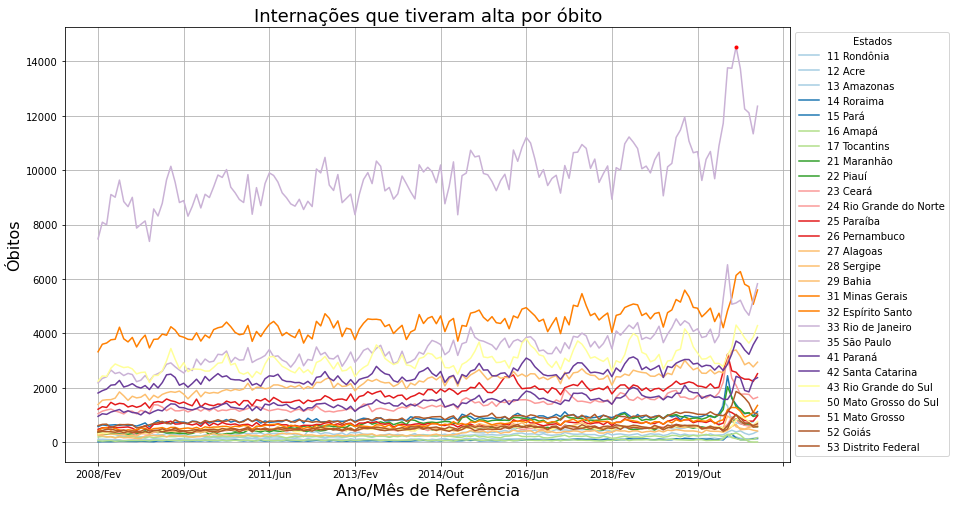

In [292]:
#Plotagem do gráfico da quantidade de internações que tiveram alta por óbitos referentes às AIH aprovadas no período por estado
ax = df_obitos.T[:-2].plot(figsize=(13,8), cmap=plt.get_cmap('Paired')) #configuração do tamanho do gráfico e paleta de cor
ax.set_xlabel('Ano/Mês de Referência', fontsize=16) #Descrição do eixo X


#pegando todos valores de São Paulo para encontar a posição do MÊS (eixo X) com maior numero casos de óbitos
valores = df_obitos[df_obitos["Estado"] == "São Paulo"].iloc[:] == int(df_obitos[df_obitos["Estado"] == "São Paulo"].T[:-2].max())
x_max = 0
#loop for que verifica a posição desse mês com maior quantidade de casos
for i in valores.T["35 São Paulo"]:
    if i == True:
        break
    x_max = x_max + 1 #resultado da posição x_max

#resultado da posição y_max com base no maior valor de São Paulo por quantidade(eixo Y)
y_max = df_obitos[df_obitos["Estado"] == "São Paulo"].T[:-2].max()
xy = (x_max, y_max)

#plotando no gráfico um ponto vermelho em destaque
ax.plot(xy[0], xy[1], ".r")

ax.set_ylabel('Óbitos', fontsize=16) #Descrição do eixo Y
plt.title('Internações que tiveram alta por óbito', fontsize=18) #Titulo
plt.grid(True) #Adicionando grade
plt.legend(bbox_to_anchor=(1, 1),title="Estados") #Posicionando a legenda
plt.show() #plotando o gráfico 

In [300]:
#criamos um dicionário apenas com os valores de mês e quantidade de óbitos de são paulo
dicio = df_obitos[df_obitos["Estado"] == "São Paulo"].T.to_dict()["35 São Paulo"]

#criamos uma função que inverte o dicionario (chave/valor) 
#e faz uma busca na chave com base no valor buscado
def encontra_chave(term):
    for k, v in dicio.items():
        if term == v:
            return k

    return None

#mostra na tela o Mês em destaque com base na regra do valor máximo pelo estado buscado
print("Mês em destaque", encontra_chave(int(df_obitos[df_obitos["Estado"] == "São Paulo"].T[:-2].max())))

Mês em destaque 2020/Jul


<AxesSubplot:xlabel='Estado'>

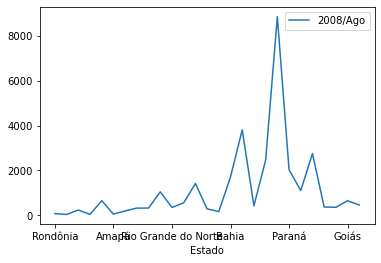

In [15]:
df_obitos.plot(x="Estado",y="2008/Ago")

In [127]:
df_obitos[df_obitos["Estado"] == "São Paulo"].T[:-2].max()

Unidade da Federação
35 São Paulo    14538.0
dtype: float64

In [158]:
teste = df_obitos[df_obitos["Estado"] == "São Paulo"].iloc[:] == df_obitos[df_obitos["Estado"] == "São Paulo"].T[:-2].max()

In [162]:
for i in teste:
    if i != False:
        i

TypeError: string indices must be integers

In [161]:
teste

,2008/Abr,2008/Ago,2008/Dez,2008/Fev,2008/Jul,2008/Jun,2008/Mai,2008/Mar,2008/Nov,2008/Out,...,2020/Jul,2020/Jun,2020/Mai,2020/Mar,2020/Nov,2020/Out,2020/Set,35 São Paulo,Estado,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [170]:
valores = df_obitos[df_obitos["Estado"] == "São Paulo"].iloc[:] == int(df_obitos[df_obitos["Estado"] == "São Paulo"].T[:-2].max())

In [237]:
int(df_obitos[df_obitos["Estado"] == "São Paulo"].T[:-2].max())

14538

In [222]:
df_obitos[df_obitos["Estado"]]

KeyError: "None of [Index(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins',\n       'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba',\n       'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais',\n       'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná',\n       'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul',\n       'Mato Grosso', 'Goiás', 'Distrito Federal'],\n      dtype='object')] are in the [columns]"

In [238]:
df_obitos[df_obitos["Estado"] == "São Paulo"][df_obitos[df_obitos["Estado"] == "São Paulo"] == int(df_obitos[df_obitos["Estado"] == "São Paulo"].T[:-2].max())]

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Região,Estado
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,14538,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
[df_obitos[df_obitos["Estado"] == "São Paulo"] == int(df_obitos[df_obitos["Estado"] == "São Paulo"].T[:-2].max())]

[                      2008/Fev  2008/Mar  2008/Abr  2008/Mai  2008/Jun  \
 Unidade da Federação                                                     
 35 São Paulo             False     False     False     False     False   
 
                       2008/Jul  2008/Ago  2008/Set  2008/Out  2008/Nov  ...  \
 Unidade da Federação                                                    ...   
 35 São Paulo             False     False     False     False     False  ...   
 
                       2020/Mai  2020/Jun  2020/Jul  2020/Ago  2020/Set  \
 Unidade da Federação                                                     
 35 São Paulo             False     False      True     False     False   
 
                       2020/Out  2020/Nov  2020/Dez  Região  Estado  
 Unidade da Federação                                                
 35 São Paulo             False     False     False   False   False  
 
 [1 rows x 157 columns]]

In [260]:
df_obitos[df_obitos["Estado"] == "São Paulo"].T.to_dict()["35 São Paulo"]

{'2008/Fev': 7477,
 '2008/Mar': 8089,
 '2008/Abr': 7993,
 '2008/Mai': 9107,
 '2008/Jun': 9007,
 '2008/Jul': 9637,
 '2008/Ago': 8848,
 '2008/Set': 8661,
 '2008/Out': 9003,
 '2008/Nov': 7872,
 '2008/Dez': 8011,
 '2009/Jan': 8136,
 '2009/Fev': 7383,
 '2009/Mar': 8577,
 '2009/Abr': 8317,
 '2009/Mai': 8785,
 '2009/Jun': 9649,
 '2009/Jul': 10144,
 '2009/Ago': 9560,
 '2009/Set': 8812,
 '2009/Out': 8883,
 '2009/Nov': 8310,
 '2009/Dez': 8669,
 '2010/Jan': 9114,
 '2010/Fev': 8612,
 '2010/Mar': 9115,
 '2010/Abr': 8995,
 '2010/Mai': 9389,
 '2010/Jun': 9823,
 '2010/Jul': 9734,
 '2010/Ago': 10024,
 '2010/Set': 9376,
 '2010/Out': 9173,
 '2010/Nov': 8924,
 '2010/Dez': 8813,
 '2011/Jan': 9838,
 '2011/Fev': 8381,
 '2011/Mar': 9360,
 '2011/Abr': 8699,
 '2011/Mai': 9511,
 '2011/Jun': 9900,
 '2011/Jul': 9807,
 '2011/Ago': 9565,
 '2011/Set': 9167,
 '2011/Out': 8989,
 '2011/Nov': 8762,
 '2011/Dez': 8678,
 '2012/Jan': 8931,
 '2012/Fev': 8556,
 '2012/Mar': 8858,
 '2012/Abr': 8663,
 '2012/Mai': 10044,
 '2012/Ju

2020/Jul


14538

In [269]:
dicio

{'pizza': {'ketchup', 'massa'}, 'feijoada': {'feijão', 'linguiça'}}

In [274]:
df_obitos[df_obitos["Estado"] == "São Paulo"].T.to_dict()

{'35 São Paulo': {'2008/Fev': 7477,
  '2008/Mar': 8089,
  '2008/Abr': 7993,
  '2008/Mai': 9107,
  '2008/Jun': 9007,
  '2008/Jul': 9637,
  '2008/Ago': 8848,
  '2008/Set': 8661,
  '2008/Out': 9003,
  '2008/Nov': 7872,
  '2008/Dez': 8011,
  '2009/Jan': 8136,
  '2009/Fev': 7383,
  '2009/Mar': 8577,
  '2009/Abr': 8317,
  '2009/Mai': 8785,
  '2009/Jun': 9649,
  '2009/Jul': 10144,
  '2009/Ago': 9560,
  '2009/Set': 8812,
  '2009/Out': 8883,
  '2009/Nov': 8310,
  '2009/Dez': 8669,
  '2010/Jan': 9114,
  '2010/Fev': 8612,
  '2010/Mar': 9115,
  '2010/Abr': 8995,
  '2010/Mai': 9389,
  '2010/Jun': 9823,
  '2010/Jul': 9734,
  '2010/Ago': 10024,
  '2010/Set': 9376,
  '2010/Out': 9173,
  '2010/Nov': 8924,
  '2010/Dez': 8813,
  '2011/Jan': 9838,
  '2011/Fev': 8381,
  '2011/Mar': 9360,
  '2011/Abr': 8699,
  '2011/Mai': 9511,
  '2011/Jun': 9900,
  '2011/Jul': 9807,
  '2011/Ago': 9565,
  '2011/Set': 9167,
  '2011/Out': 8989,
  '2011/Nov': 8762,
  '2011/Dez': 8678,
  '2012/Jan': 8931,
  '2012/Fev': 8556,
  

In [361]:
from itertools import islice, cycle
cores = list(islice(cycle([(0.65, 0.999*x/29.0, 0.001*x/29.0) for x in range(len(df_obitos["2020/Jul"]))]), None, len(df_obitos["2020/Jul"])))
cores

[(0.65, 0.0, 0.0),
 (0.65, 0.034448275862068965, 3.4482758620689657e-05),
 (0.65, 0.06889655172413793, 6.896551724137931e-05),
 (0.65, 0.10334482758620689, 0.00010344827586206896),
 (0.65, 0.13779310344827586, 0.00013793103448275863),
 (0.65, 0.17224137931034483, 0.0001724137931034483),
 (0.65, 0.20668965517241378, 0.00020689655172413793),
 (0.65, 0.24113793103448278, 0.0002413793103448276),
 (0.65, 0.2755862068965517, 0.00027586206896551725),
 (0.65, 0.31003448275862067, 0.0003103448275862069),
 (0.65, 0.34448275862068967, 0.0003448275862068966),
 (0.65, 0.37893103448275867, 0.0003793103448275862),
 (0.65, 0.41337931034482756, 0.00041379310344827585),
 (0.65, 0.44782758620689656, 0.00044827586206896557),
 (0.65, 0.48227586206896556, 0.0004827586206896552),
 (0.65, 0.5167241379310344, 0.0005172413793103448),
 (0.65, 0.5511724137931034, 0.0005517241379310345),
 (0.65, 0.5856206896551724, 0.0005862068965517242),
 (0.65, 0.6200689655172413, 0.0006206896551724138),
 (0.65, 0.65451724137931

In [438]:
cores_sudeste = list(islice(cycle([(0.75+x/12, x/(x+1/25.0), 0.1/(x+1)) for x in range(len(df_obitos[df_obitos["Região"] == "Sudeste"]))]), None, len(df_obitos[df_obitos["Região"] == "Sudeste"])))
cores_sudeste

[(0.75, 0.0, 0.1),
 (0.8333333333333334, 0.9615384615384615, 0.05),
 (0.9166666666666666, 0.9803921568627451, 0.03333333333333333),
 (1.0, 0.9868421052631579, 0.025)]

In [439]:
(df_obitos.T[:-2]/df_media_permanencia.T[:-2])

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2008/Fev,19.1176,23.9583,62.449,3.6,153.421,11.9608,41.4583,70.8163,71.5556,206.667,...,68.8525,145.667,923.086,348.654,177.037,381.017,68.0435,87.2093,128.125,60.2985
2008/Mar,27.1053,23.913,57.8723,5.95745,168.684,8.8,47.7778,71.087,74.3182,224.902,...,93.3929,293.625,1304.68,372.353,198.302,428.246,74.7826,96.4286,143.696,71.3115
2008/Abr,24,22.3913,61.4583,6,168.649,10.9615,43.2609,72.8889,65.7778,237.8,...,87.2581,280.116,1248.91,383.922,187.091,417.759,72.1739,93.0233,145.435,76.3492
2008/Mai,19.5745,22.8889,62.0408,5.65217,171.622,13.617,45.8696,69.1489,76.5909,235.192,...,77.7586,328.025,1445.56,404.231,202.364,461.695,75.6,92.619,115.319,80
2008/Jun,25.2381,22.3256,60.8511,8.13953,170.526,8.125,38.6957,70,70.2222,225.882,...,90.8772,293.953,1452.74,415.49,214.815,496.724,82.2917,86.5116,112.83,70.7937
2008/Jul,20.5128,21.9048,52.1277,7.69231,165,11.2766,43.8298,71.25,69.1111,225.918,...,73.2258,317.654,1529.68,437.692,223.704,484.31,84.1667,94.8837,125.769,66.5625
2008/Ago,19.7222,9.5,51.7778,8.29787,175.676,10.8333,44.0909,68.0851,73.1818,204.706,...,72.7586,299.39,1382.5,398.627,196.786,465.593,76.6667,84.5238,132.245,73.7097
2008/Set,21.3889,17.1429,44.5652,8.2,171.389,13.4043,46.0465,71.1364,73.6585,230.6,...,82.3214,324.872,1396.94,416.2,218.868,477.759,74.1667,96.5854,143.043,65.5738
2008/Out,24.8571,20,51.3043,7.44681,170.27,13.2653,48.6957,63,77.2727,224.314,...,82.037,296.667,1429.05,422.941,199.455,457.458,81.2245,83.4884,131.224,68.5246
2008/Nov,21.9444,17.907,45.3333,7.17391,161.351,14.375,39.5455,64.8936,81.6279,205.49,...,79.4915,265.357,1108.73,401.176,200,441.404,78.125,85.5814,99.6226,65.1613


In [363]:
df_obitos["Região"] == "Sudeste"

Unidade da Federação
11 Rondônia               False
12 Acre                   False
13 Amazonas               False
14 Roraima                False
15 Pará                   False
16 Amapá                  False
17 Tocantins              False
21 Maranhão               False
22 Piauí                  False
23 Ceará                  False
24 Rio Grande do Norte    False
25 Paraíba                False
26 Pernambuco             False
27 Alagoas                False
28 Sergipe                False
29 Bahia                  False
31 Minas Gerais            True
32 Espírito Santo          True
33 Rio de Janeiro          True
35 São Paulo               True
41 Paraná                 False
42 Santa Catarina         False
43 Rio Grande do Sul      False
50 Mato Grosso do Sul     False
51 Mato Grosso            False
52 Goiás                  False
53 Distrito Federal       False
Name: Região, dtype: bool

In [343]:
x = df_obitos["Estado"]
y = df_obitos["2020/Jul"]
cores = [(x/10.0, x/20.0, 0.75) for x in range(len(df_obitos["2020/Jul"]))]
cores

[(0.0, 0.0, 0.75),
 (0.1, 0.05, 0.75),
 (0.2, 0.1, 0.75),
 (0.3, 0.15, 0.75),
 (0.4, 0.2, 0.75),
 (0.5, 0.25, 0.75),
 (0.6, 0.3, 0.75),
 (0.7, 0.35, 0.75),
 (0.8, 0.4, 0.75),
 (0.9, 0.45, 0.75),
 (1.0, 0.5, 0.75),
 (1.1, 0.55, 0.75),
 (1.2, 0.6, 0.75),
 (1.3, 0.65, 0.75),
 (1.4, 0.7, 0.75),
 (1.5, 0.75, 0.75),
 (1.6, 0.8, 0.75),
 (1.7, 0.85, 0.75),
 (1.8, 0.9, 0.75),
 (1.9, 0.95, 0.75),
 (2.0, 1.0, 0.75),
 (2.1, 1.05, 0.75),
 (2.2, 1.1, 0.75),
 (2.3, 1.15, 0.75),
 (2.4, 1.2, 0.75),
 (2.5, 1.25, 0.75),
 (2.6, 1.3, 0.75)]

In [334]:
import random
x = [{i: random.randint(1, 5)} for i in range(30)]
df = pd.DataFrame(x)
df.plot(kind='bar', stacked=True, color=color, legend=False, figsize=(12, 4))

NameError: name 'color' is not defined

In [327]:
tips = sns.load_dataset("tips")
sns.barplot(data=).set_title('Internações que tiveram alta por óbito em Julho de 2020', fontsize=18)

ValueError: could not convert string to float: 'Rondônia'

In [450]:
df_media_permanencia.T[:-2]

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2008/Fev,3.4,4.8,4.9,5,3.8,5.1,4.8,4.9,4.5,5.1,...,6.1,15,8.1,5.2,5.4,5.9,4.6,4.3,4.8,6.7
2008/Mar,3.8,4.6,4.7,4.7,3.8,5,4.5,4.6,4.4,5.1,...,5.6,8,6.2,5.1,5.3,5.7,4.6,4.2,4.6,6.1
2008/Abr,4,4.6,4.8,4.5,3.7,5.2,4.6,4.5,4.5,5,...,6.2,8.6,6.4,5.1,5.5,5.8,4.6,4.3,4.6,6.3
2008/Mai,4.7,4.5,4.9,4.6,3.7,4.7,4.6,4.7,4.4,5.2,...,5.8,8.1,6.3,5.2,5.5,5.9,5,4.2,4.7,6.1
2008/Jun,4.2,4.3,4.7,4.3,3.8,4.8,4.6,4.7,4.5,5.1,...,5.7,8.6,6.2,5.1,5.4,5.8,4.8,4.3,5.3,6.3
2008/Jul,3.9,4.2,4.7,5.2,3.8,4.7,4.7,4.8,4.5,4.9,...,6.2,8.1,6.3,5.2,5.4,5.8,4.8,4.3,5.2,6.4
2008/Ago,3.6,4,4.5,4.7,3.7,4.8,4.4,4.7,4.4,5.1,...,5.8,8.2,6.4,5.1,5.6,5.9,4.8,4.2,4.9,6.2
2008/Set,3.6,4.2,4.6,5,3.6,4.7,4.3,4.4,4.1,5,...,5.6,7.8,6.2,5,5.3,5.8,4.8,4.1,4.6,6.1
2008/Out,3.5,4.4,4.6,4.7,3.7,4.9,4.6,5,4.4,5.1,...,5.4,8.4,6.3,5.1,5.5,5.9,4.9,4.3,4.9,6.1
2008/Nov,3.6,4.3,4.5,4.6,3.7,4.8,4.4,4.7,4.3,5.1,...,5.9,8.4,7.1,5.1,5.4,5.7,4.8,4.3,5.3,6.2


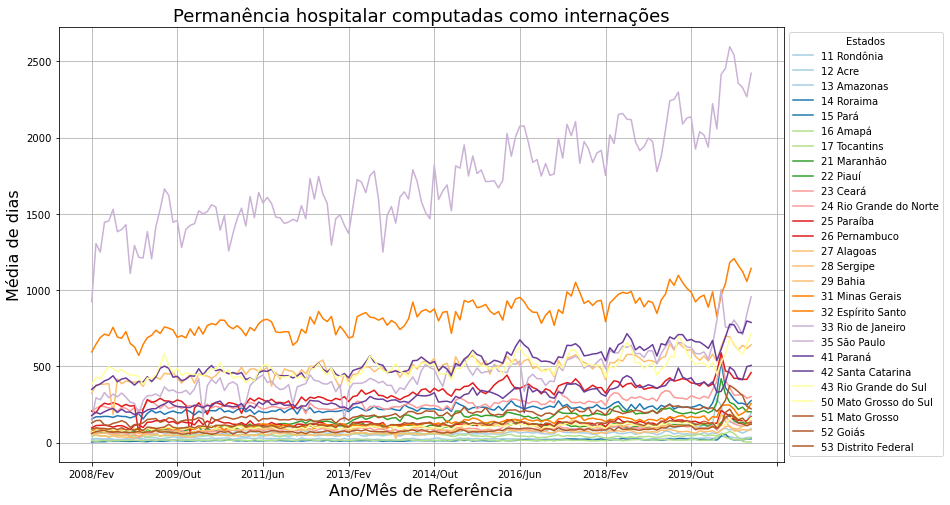

In [449]:
#Plotagem do gráfico da taxa de óbitos em relação a media de 
ax2 = (df_obitos.T[:-2]/df_media_permanencia.T[:-2]).plot(figsize=(13,8), cmap=plt.get_cmap('Paired')) #configuração do tamanho do gráfico e paleta de cor
ax2.set_xlabel('Ano/Mês de Referência', fontsize=16) #Descrição do eixo X
ax2.set_ylabel('Média de dias', fontsize=16) #Descrição do eixo Y


plt.title('Permanência hospitalar computadas como internações', fontsize=18) #Titulo
plt.grid(True) #Adicionando grade
plt.legend(bbox_to_anchor=(1, 1),title="Estados") #Posicionando a legenda
plt.show() #plotando o gráfico

<AxesSubplot:>

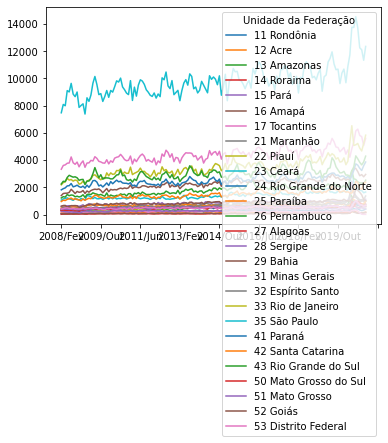

In [453]:
df_obitos.T[:-2].plot()

<AxesSubplot:>

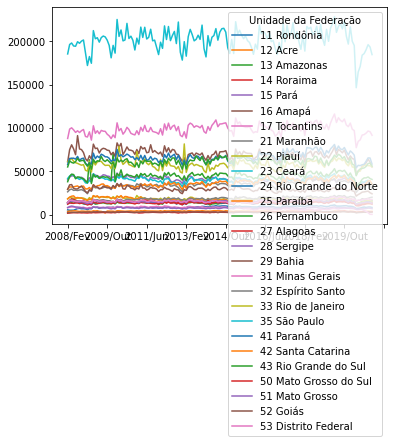

In [454]:
df_aih_aprovadas.T[:-2].plot()

In [464]:
df_obitos_sudeste = df_obitos[df_obitos["Região"] == "Sudeste"]
df_aih_aprovadas_sudeste = df_aih_aprovadas[df_aih_aprovadas["Região"] == "Sudeste"]
df_obitos_sudeste.T[:-2]/df_aih_aprovadas_sudeste.T[:-2]*100

Unidade da Federação,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo
2008/Fev,3.78513,2.94571,3.55869,4.03342
2008/Mar,3.65267,3.081,3.7414,4.12153
2008/Abr,3.64253,3.12988,3.70564,4.0374
2008/Mai,3.8528,2.76738,4.31408,4.68111
2008/Jun,3.99119,3.26155,4.21474,4.63695
2008/Jul,4.37281,2.90151,4.34768,4.83159
2008/Ago,4.01545,2.60832,4.22802,4.47665
2008/Set,3.80873,2.86995,4.43705,4.3268
2008/Out,3.92366,2.7133,4.31747,4.46886
2008/Nov,3.88558,3.15655,4.34757,4.21928


In [465]:
df_obitos["Região"]

Unidade da Federação
11 Rondônia                      Norte
12 Acre                          Norte
13 Amazonas                      Norte
14 Roraima                       Norte
15 Pará                          Norte
16 Amapá                         Norte
17 Tocantins                     Norte
21 Maranhão                   Nordeste
22 Piauí                      Nordeste
23 Ceará                      Nordeste
24 Rio Grande do Norte        Nordeste
25 Paraíba                    Nordeste
26 Pernambuco                 Nordeste
27 Alagoas                    Nordeste
28 Sergipe                    Nordeste
29 Bahia                      Nordeste
31 Minas Gerais                Sudeste
32 Espírito Santo              Sudeste
33 Rio de Janeiro              Sudeste
35 São Paulo                   Sudeste
41 Paraná                          Sul
42 Santa Catarina                  Sul
43 Rio Grande do Sul               Sul
50 Mato Grosso do Sul     Centro-Oeste
51 Mato Grosso            Centro-Oeste
52 G

In [457]:
df_obitos_sudeste.T[:-2]/df_aih_aprovadas_sudeste.T[:-2]*100

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2008/Fev,1.16864,3.08891,2.21258,1.03508,1.44913,2.42931,2.50346,1.31509,1.74148,2.52328,...,2.94571,3.55869,4.03342,3.13473,3.26202,4.08215,2.57974,2.75837,2.09633,2.83987
2008/Mar,2.01763,2.64233,1.82919,1.36786,1.47958,1.841,2.47867,1.13644,1.64619,2.57296,...,3.081,3.7414,4.12153,2.92523,3.27905,3.9383,2.54777,2.51069,1.92017,2.6219
2008/Abr,1.85507,2.43902,2.05962,1.22117,1.39273,2.14044,2.22944,1.10878,1.52782,2.56123,...,3.12988,3.70564,4.0374,3.01231,3.22389,4.02118,2.50964,2.5618,1.92651,2.89986
2008/Mai,1.7871,2.30374,2.03835,1.0766,1.41422,2.33577,2.37345,1.15695,1.7656,2.6755,...,2.76738,4.31408,4.68111,3.22437,3.46147,4.57961,2.8866,2.47424,1.77787,3.05382
2008/Jun,1.73799,2.14381,1.96186,1.52505,1.49233,1.44498,2.0729,1.16197,1.70185,2.72295,...,3.26155,4.21474,4.63695,3.30603,3.54849,4.7039,2.93135,2.44672,2.01476,2.89874
2008/Jul,1.12994,2.25325,1.64011,1.79533,1.48691,1.98205,2.66563,1.22497,1.62964,2.62895,...,2.90151,4.34768,4.83159,3.38721,3.63582,4.3244,2.94891,2.67208,2.20069,2.81932
2008/Ago,0.968358,0.993984,1.61592,1.69713,1.52475,1.77414,2.2926,1.12736,1.67516,2.5677,...,2.60832,4.22802,4.47665,3.24615,3.50699,4.45103,2.87253,2.43134,2.0405,2.91826
2008/Set,1.12,1.72166,1.5357,1.93762,1.4293,2.20898,2.3608,1.08028,1.5625,2.75705,...,2.86995,4.43705,4.3268,3.22032,3.5561,4.44206,2.65078,2.62756,1.99225,2.49097
2008/Out,1.25959,2.12509,1.87198,1.5873,1.51515,2.15446,2.59259,1.13228,1.77629,2.84613,...,2.7133,4.31747,4.46886,3.30894,3.32545,4.29976,2.95911,2.46464,2.13863,2.67708
2008/Nov,1.17928,1.96029,1.68081,1.55514,1.51116,2.38177,2.23794,1.15064,1.93367,2.85442,...,3.15655,4.34757,4.21928,3.44352,3.63416,4.26687,3.0135,2.7512,1.97723,2.68278


In [470]:
df_obitos_sudeste = df_obitos[df_obitos["Região"] == "Sudeste"]
df_aih_aprovadas_sudeste = df_aih_aprovadas[df_aih_aprovadas["Região"] == "Sudeste"]
df_taxa_mortalidade_sudeste = df_obitos_sudeste.T[:-2]/df_aih_aprovadas_sudeste.T[:-2]*100
df_taxa_mortalidade_sudeste.T["2020/Jul"]

Unidade da Federação
31 Minas Gerais      6.67871
32 Espírito Santo    6.89767
33 Rio de Janeiro    9.24933
35 São Paulo         7.90397
Name: 2020/Jul, dtype: object

In [504]:
df_taxa_mortalidade_sudeste.iloc[:] 

Unidade da Federação,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo
2008/Fev,3.78513,2.94571,3.55869,4.03342
2008/Mar,3.65267,3.081,3.7414,4.12153
2008/Abr,3.64253,3.12988,3.70564,4.0374
2008/Mai,3.8528,2.76738,4.31408,4.68111
2008/Jun,3.99119,3.26155,4.21474,4.63695
2008/Jul,4.37281,2.90151,4.34768,4.83159
2008/Ago,4.01545,2.60832,4.22802,4.47665
2008/Set,3.80873,2.86995,4.43705,4.3268
2008/Out,3.92366,2.7133,4.31747,4.46886
2008/Nov,3.88558,3.15655,4.34757,4.21928


In [503]:
valores = df_taxa_mortalidade_sudeste.iloc[:] == int(df_taxa_mortalidade_sudeste.T[:-2].max())
valores

TypeError: cannot convert the series to <class 'int'>

In [498]:
df_taxa_mortalidade_sudeste["33 Rio de Janeiro"]

2008/Fev    3.55869
2008/Mar     3.7414
2008/Abr    3.70564
2008/Mai    4.31408
2008/Jun    4.21474
2008/Jul    4.34768
2008/Ago    4.22802
2008/Set    4.43705
2008/Out    4.31747
2008/Nov    4.34757
2008/Dez    4.53778
2009/Jan    3.98062
2009/Fev    4.57479
2009/Mar    3.95338
2009/Abr    4.40715
2009/Mai    4.29355
2009/Jun    4.65921
2009/Jul    4.75183
2009/Ago    4.73495
2009/Set    4.67691
2009/Out    4.47141
2009/Nov    4.77161
2009/Dez    4.95744
2010/Jan    4.99355
2010/Fev    5.37298
2010/Mar    4.82002
2010/Abr    3.74015
2010/Mai    4.69845
2010/Jun    5.57672
2010/Jul    5.35601
2010/Ago    5.38568
2010/Set    5.09365
2010/Out    5.48046
2010/Nov    5.43588
2010/Dez    5.51065
2011/Jan    4.77464
2011/Fev    4.66425
2011/Mar    4.97537
2011/Abr    5.02465
2011/Mai    4.96507
2011/Jun    5.74471
2011/Jul    5.47063
2011/Ago    5.26926
2011/Set    5.43094
2011/Out    5.40209
2011/Nov    5.32388
2011/Dez    5.85179
2012/Jan    5.08344
2012/Fev    5.53153
2012/Mar      5.006


In [550]:
df_taxa_mortalidade_sudeste["33 Rio de Janeiro"]

3.7413990825688073

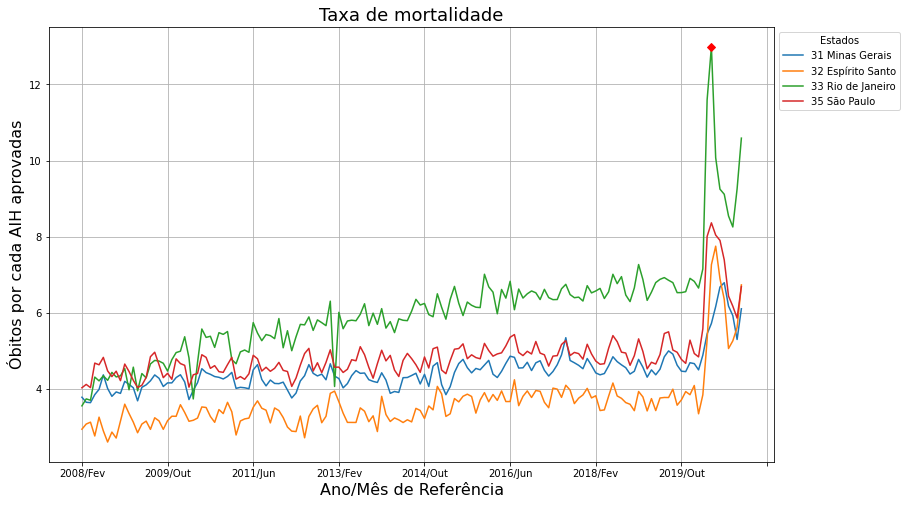

In [555]:
#Plotagem do gráfico da taxa de mortalidade nos estados do sudeste
ax = df_taxa_mortalidade_sudeste.plot(figsize=(13,8)) #configuração do tamanho do gráfico
ax.set_xlabel('Ano/Mês de Referência', fontsize=16) #Descrição do eixo X

x_max = 0
#loop for entre todos os valores do Rio de Janeiro para encontrar a posição do MÊS (eixo X) com maior taxa de mortalidade
for i in df_taxa_mortalidade_sudeste["33 Rio de Janeiro"]:
    if i == df_taxa_mortalidade_sudeste["33 Rio de Janeiro"].max():
        break
    x_max = x_max + 1
y_max = df_taxa_mortalidade_sudeste["33 Rio de Janeiro"].max()

#plotando no gráfico um ponto vermelho em destaque
ax.plot(x_max, y_max, ".r", marker="D")


ax.set_ylabel('Óbitos por cada AIH aprovadas', fontsize=16) #Descrição do eixo Y
plt.title('Taxa de mortalidade', fontsize=18) #Titulo
plt.grid(True) #Adicionando grade
plt.legend(bbox_to_anchor=(1, 1),title="Estados") #Posicionando a legenda
plt.show() #plotando o gráfico 

12.990605843483799

In [509]:
#pegando todos valores de São Paulo para encontar a posição do MÊS (eixo X) com maior numero casos de óbitos
valores = df_obitos[df_obitos["Estado"] == "São Paulo"].iloc[:] == float(df_taxa_mortalidade_sudeste["33 Rio de Janeiro"].max())
x_max = 0
#loop for que verifica a posição desse mês com maior quantidade de casos
for i in valores.T["35 São Paulo"]:
    if i == True:
        break
    x_max = x_max + 1 #resultado da posição x_max

#resultado da posição y_max com base no maior valor de São Paulo por quantidade(eixo Y)
y_max = df_obitos[df_obitos["Estado"] == "São Paulo"].T[:-2].max()
xy = (x_max, y_max)

In [556]:
df_taxa_mortalidade_sudeste["33 Rio de Janeiro"] == df_taxa_mortalidade_sudeste["33 Rio de Janeiro"].max()

2008/Fev    False
2008/Mar    False
2008/Abr    False
2008/Mai    False
2008/Jun    False
2008/Jul    False
2008/Ago    False
2008/Set    False
2008/Out    False
2008/Nov    False
2008/Dez    False
2009/Jan    False
2009/Fev    False
2009/Mar    False
2009/Abr    False
2009/Mai    False
2009/Jun    False
2009/Jul    False
2009/Ago    False
2009/Set    False
2009/Out    False
2009/Nov    False
2009/Dez    False
2010/Jan    False
2010/Fev    False
2010/Mar    False
2010/Abr    False
2010/Mai    False
2010/Jun    False
2010/Jul    False
2010/Ago    False
2010/Set    False
2010/Out    False
2010/Nov    False
2010/Dez    False
2011/Jan    False
2011/Fev    False
2011/Mar    False
2011/Abr    False
2011/Mai    False
2011/Jun    False
2011/Jul    False
2011/Ago    False
2011/Set    False
2011/Out    False
2011/Nov    False
2011/Dez    False
2012/Jan    False
2012/Fev    False
2012/Mar    False
2012/Abr    False
2012/Mai    False
2012/Jun    False
2012/Jul    False
2012/Ago    False
2012/Set  

In [511]:
df_taxa_mortalidade_sudeste["33 Rio de Janeiro"].max()

12.990605843483799

In [513]:
int(df_obitos[df_obitos["Estado"] == "São Paulo"].T[:-2].max())

14538

In [525]:
type(df_obitos[df_obitos["Estado"] == "São Paulo"].iloc[:])

pandas.core.frame.DataFrame

In [527]:
type(df_taxa_mortalidade_sudeste.iloc["33 Rio de Janeiro"])

TypeError: Cannot index by location index with a non-integer key

SyntaxError: invalid syntax (<ipython-input-534-b0b1b726a830>, line 1)

In [538]:
df_taxa_mortalidade_sudeste.T

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,3.78513,3.65267,3.64253,3.8528,3.99119,4.37281,4.01545,3.80873,3.92366,3.88558,...,4.89004,5.44904,5.72229,6.16494,6.67871,6.79267,6.17875,5.92826,5.3015,6.10826
32 Espírito Santo,2.94571,3.081,3.12988,2.76738,3.26155,2.90151,2.60832,2.86995,2.7133,3.15655,...,3.84824,5.2904,7.26416,7.75175,6.89767,6.35593,5.06357,5.26511,5.61672,6.73544
33 Rio de Janeiro,3.55869,3.7414,3.70564,4.31408,4.21474,4.34768,4.22802,4.43705,4.31747,4.34757,...,7.15407,11.595,12.9906,10.0747,9.24933,9.1155,8.54431,8.25612,9.25523,10.5893
35 São Paulo,4.03342,4.12153,4.0374,4.68111,4.63695,4.83159,4.47665,4.3268,4.46886,4.21928,...,5.58041,8.00787,8.36525,8.04319,7.90397,7.3902,6.43964,6.17557,5.8634,6.69064


In [557]:
df_obitos

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Região,Estado
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,65,103,96,92,106,80,71,77,87,79,...,377,444,386,423,335,283,326,402,Norte,Rondônia
12 Acre,115,110,103,103,96,92,38,72,88,77,...,190,205,200,150,131,122,147,172,Norte,Acre
13 Amazonas,306,272,295,304,286,245,233,205,236,204,...,1335,750,720,684,693,691,759,999,Norte,Amazonas
14 Roraima,18,28,27,26,35,40,39,41,35,33,...,241,306,159,98,99,101,133,139,Norte,Roraima
15 Pará,583,641,624,635,648,627,650,617,630,597,...,2449,1614,1393,1193,1052,1082,978,1127,Norte,Pará
16 Amapá,61,44,57,64,39,53,52,63,65,69,...,285,173,138,93,87,111,113,169,Norte,Amapá
17 Tocantins,199,215,199,211,178,206,194,198,224,174,...,294,294,347,268,131,22,12,13,Norte,Tocantins
21 Maranhão,347,327,328,325,329,342,320,313,315,305,...,2050,1652,1315,1231,1067,1091,951,989,Nordeste,Maranhão
22 Piauí,322,327,296,337,316,311,322,302,340,351,...,621,778,862,700,639,641,584,573,Nordeste,Piauí


In [563]:
df_taxa_mortalidade_sudeste.set_index = ["Minas Gerais", "Espírito Santo", "Rio de Janeiro", "São Paulo"]

In [566]:
df_taxa_mortalidade_sudeste_invertido = df_taxa_mortalidade_sudeste.T

In [568]:
df_taxa_mortalidade_sudeste_invertido.index

Index(['31 Minas Gerais', '32 Espírito Santo', '33 Rio de Janeiro',
       '35 São Paulo'],
      dtype='object', name='Unidade da Federação')